In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input

### Linear Autoencoders

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [4]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

3


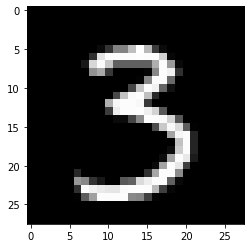

In [6]:
i = np.random.randint(0,59999)
print(y_train[i])
plt.imshow(X_train[i],cmap="gray");

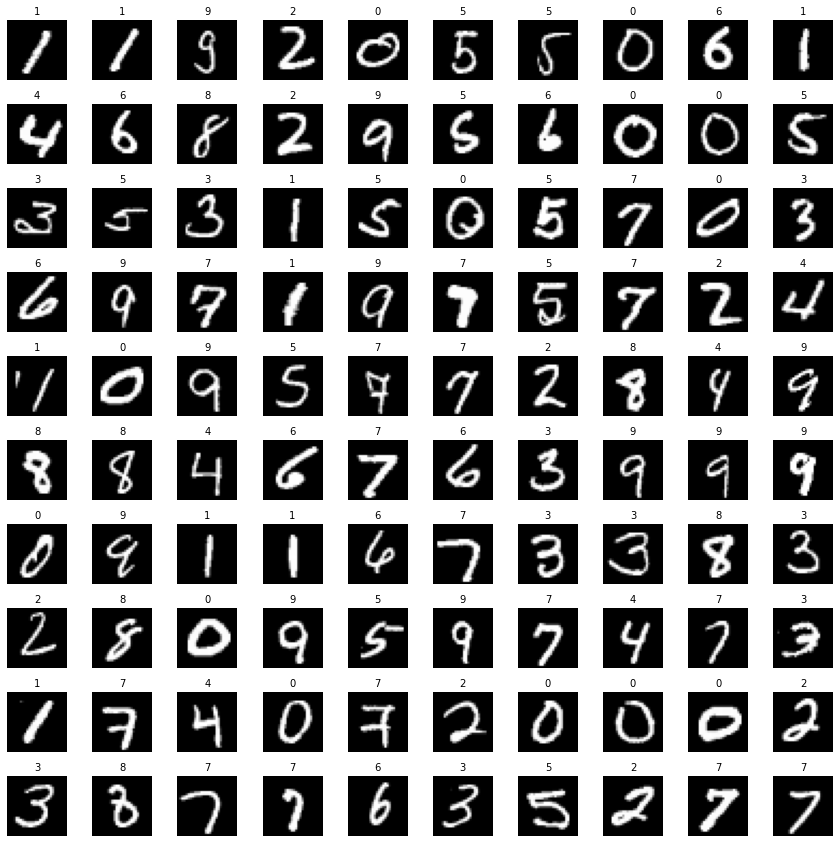

In [7]:
width,height = 10,10

fig,axes = plt.subplots(height,width,figsize=(15,15))
axes = axes.ravel()  # 10,10->[100]
for i in range(0,width*height):
    index = np.random.randint(0,59999)
    axes[i].imshow(X_train[index],cmap="gray")
    axes[i].set_title(y_train[index],fontsize=10)
    axes[i].axis("off")
plt.subplots_adjust(hspace=0.4)

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

In [10]:
X_train.shape,X_test.shape

((60000, 784), (10000, 784))

In [11]:
autoencoder = Sequential()

# Encode layers
autoencoder.add(Dense(units=128,activation="relu",input_dim=784))
autoencoder.add(Dense(units=64,activation="relu"))
autoencoder.add(Dense(units=32,activation="relu"))

# Decode layers
autoencoder.add(Dense(units=64,activation="relu"))
autoencoder.add(Dense(units=128,activation="relu"))
autoencoder.add(Dense(units=784,activation="sigmoid"))

autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               101136    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
__________________________________________________

In [12]:
autoencoder.compile(optimizer="Adam",
                    loss="binary_crossentropy",
                    metrics=["accuracy"])

In [13]:
autoencoder.fit(X_train,X_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1492 - accuracy: 0.0132
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1071 - accuracy: 0.0120
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0977 - accuracy: 0.0124
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0932 - accuracy: 0.0130
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0907 - accuracy: 0.0135
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0889 - accuracy: 0.0137
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0875 - accuracy: 0.0136
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0863 - accuracy: 0.0134
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0854 - accuracy: 0.0134
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.084

In [14]:
autoencoder.evaluate(X_test,X_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0835 - accuracy: 0.0118


[0.08353197574615479, 0.011800000444054604]

In [15]:
encoder = Model(inputs=autoencoder.input,outputs=autoencoder.get_layer("dense_2").output)

In [16]:
encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_input (InputLayer)     [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


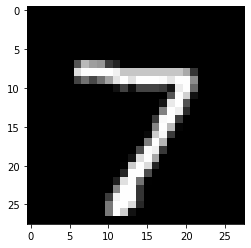

In [19]:
plt.imshow(X_test[0].reshape(28,28),cmap="gray");

In [40]:
encoded_image = encoder.predict(X_test[0].reshape(1,-1))

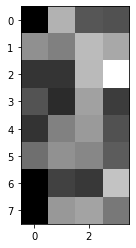

In [41]:
plt.imshow(encoded_image.reshape(8,4),cmap="gray");

In [42]:
input_layer_decoder = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[3]
decoder_layer2 = autoencoder.layers[4]
decoder_layer3 = autoencoder.layers[5]

decoder = Model(inputs=input_layer_decoder,outputs=decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))))

decoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               101136    
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________


In [43]:
decoded_image = decoder.predict(encoded_image)

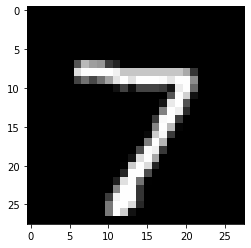

In [44]:
plt.imshow(X_test[0].reshape(28,28),cmap="gray");

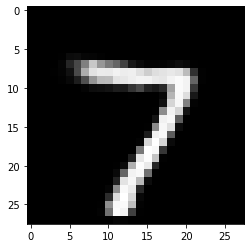

In [45]:
plt.imshow(decoded_image.reshape(28,28),cmap="gray");

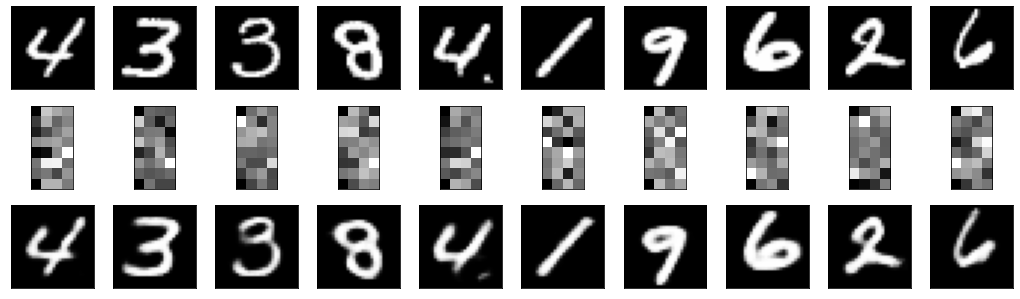

In [59]:
n = 10
test_images = np.random.randint(9,X_test.shape[0]-1,size=n)
plt.figure(figsize=(18,18))
for i,image_index in enumerate(test_images):
    # original images
    ax = plt.subplot(10,10,i+1)
    plt.imshow(X_test[image_index].reshape(28,28),cmap="gray")
    plt.xticks(())
    plt.yticks(())
    
    # Coded images
    ax = plt.subplot(10,10,i+1+n)
    encoded_image = encoder.predict(X_test[image_index].reshape(1,-1))
    plt.imshow(encoded_image.reshape(8,4),cmap="gray")
    plt.xticks(())
    plt.yticks(())
    
    # Decoded images
    ax = plt.subplot(10,10,i+1+n*2)
    decoded_image = decoder.predict(encoded_image)
    plt.imshow(decoded_image.reshape(28,28),cmap="gray")
    plt.xticks(())
    plt.yticks(())

### Convolutional Autoencoders

In [62]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,UpSampling2D,Reshape,Flatten
from tensorflow.keras.datasets import fashion_mnist

(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [64]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [68]:
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
           "Sandal","Shirt","Sneaker","Bag","Ankle boot"]

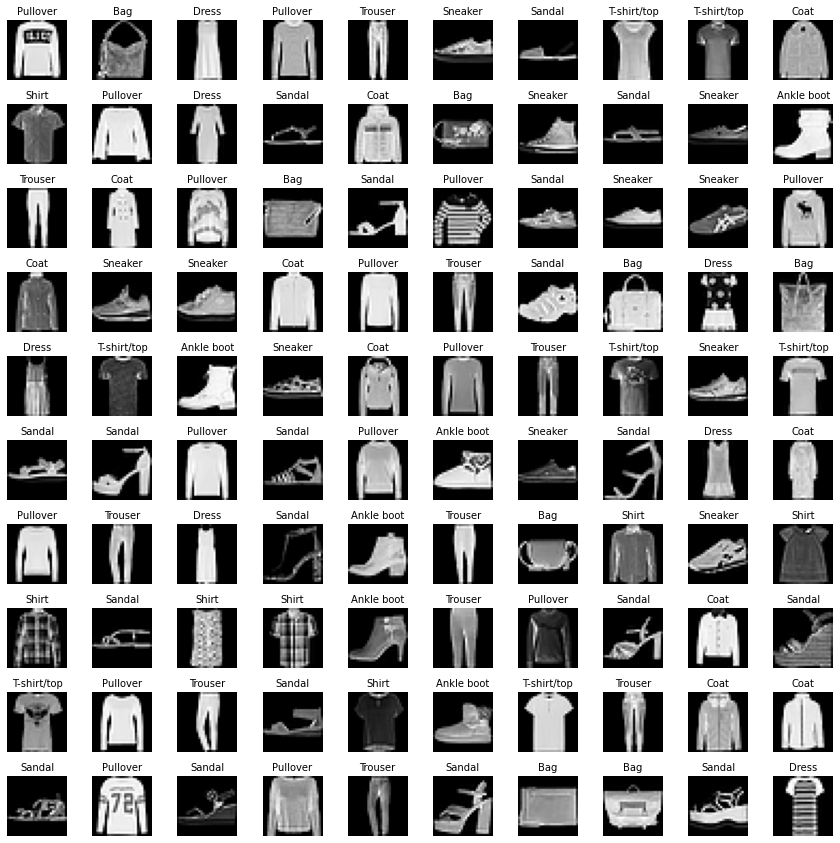

In [73]:
width,height = 10,10

fig, axes = plt.subplots(width,height,figsize=(15,15))
axes = axes.ravel()
for i in range(0,width*height):
    index = np.random.randint(0,59999)
    axes[i].imshow(X_train[index],cmap='gray')
    axes[i].set_title(classes[y_train[index]],fontsize=10)
    axes[i].axis("off")
plt.subplots_adjust(hspace=0.4)

In [74]:
X_train = X_train/255
X_test = X_test/255

In [75]:
X_train = X_train.reshape((len(X_train),28,28,1))
X_test = X_test.reshape((len(X_test),28,28,1))

In [92]:
autoencoder = Sequential()

# Encoder
autoencoder.add(Conv2D(filters=16,kernel_size=(3,3),activation="relu",input_shape=(28,28,1),padding="same"))
autoencoder.add(MaxPooling2D(pool_size=(2,2)))

autoencoder.add(Conv2D(filters=8,kernel_size=(3,3),activation="relu",padding="same"))
autoencoder.add(MaxPooling2D(pool_size=(2,2),padding="same"))

autoencoder.add(Conv2D(filters=8,kernel_size=(3,3),strides=(2,2),padding="same"))
autoencoder.add(Flatten())

# Decoder
autoencoder.add(Reshape((4,4,8)))

autoencoder.add(Conv2D(filters=8,kernel_size=(3,3),activation="relu",padding="same"))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters=8,kernel_size=(3,3),activation="relu",padding="same"))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters=16,kernel_size=(3,3),activation="relu"))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters=1,kernel_size=(3,3),activation="sigmoid",padding="same"))

autoencoder.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_12 (Flatten)         (None, 128)               0         
_________________________________________________________________
reshape_9 (Reshape)          (None, 4, 4, 8)         

In [ ]:
# Output = (Input-Filter+1)/Stride

# Input: (28,28,1)
# Filter size: 3
# Output: (28-3+1)/1 = 26 -> (26,26,16)

# UpSampling2D: (16,16,8)
# Filter: 3
# Output: (16-3+1)/1 = 14 -> (14,14,16)

In [93]:
autoencoder.compile(optimizer="Adam",
                    loss="binary_crossentropy",
                    metrics=["accuracy"])

In [94]:
autoencoder.fit(X_train,X_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.3091 - accuracy: 0.5042
Epoch 2/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2860 - accuracy: 0.5066
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2815 - accuracy: 0.5073
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2790 - accuracy: 0.5076
Epoch 5/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2774 - accuracy: 0.5078
Epoch 6/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.2762 - accuracy: 0.5080
Epoch 7/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2753 - accuracy: 0.5081
Epoch 8/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2745 - accuracy: 0.5082
Epoch 9/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2737 - accuracy: 0.5083
Epoch 10/10
1875/1875 [==============================] - 57s 30m

In [110]:
autoencoder.evaluate(X_test,X_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2753 - accuracy: 0.5059


[0.2753167152404785, 0.5059406757354736]

In [97]:
encoder = Model(inputs=autoencoder.input,outputs=autoencoder.get_layer("flatten_12").output)
encoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58_input (InputLayer) [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_12 (Flatten)         (None, 128)               0   

In [98]:
encoded_test_images = encoder.predict(X_test)

In [101]:
encoded_test_images.shape

(10000, 128)

In [99]:
decoded_test_images = autoencoder.predict(X_test)

In [100]:
decoded_test_images.shape

(10000, 28, 28, 1)

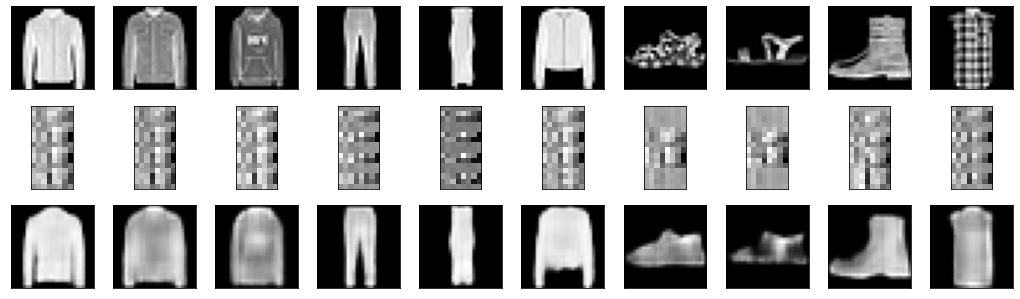

In [109]:
n = 10
test_images = np.random.randint(0,X_test.shape[0]-1,size=n)
plt.figure(figsize=(18,18))
for i,image_index in enumerate(test_images):
    # Original Images
    ax = plt.subplot(10,10,i+1)
    plt.imshow(X_test[image_index].reshape(28,28),cmap="gray")
    plt.xticks(())
    plt.yticks(())
    
    # Encoded Images
    ax = plt.subplot(10,10,i+1+n)
    plt.imshow(encoded_test_images[image_index].reshape(16,8),cmap="gray")
    plt.xticks(())
    plt.yticks(())
    
    # Decoded Images
    ax = plt.subplot(10,10,i+1+n*2)
    plt.imshow(decoded_test_images[image_index].reshape(28,28),cmap="gray")
    plt.xticks(())
    plt.yticks(())